# Exploração dados COVID-19 em Portugal
Os dados referentes às estatísticas do COVID-19 em Portugal foram retirados do repositório: https://github.com/jgrocha/covid-pt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import Image

Na seguinte tabela é possível observar a evolução do COVID-19 em Portugal. 

In [2]:
df_1 = pd.read_csv("https://raw.githubusercontent.com/jgrocha/covid-pt/master/situacao_epidemiologica.csv")
df_1.head()

,id,url,data_relatorio,suspeitos,confirmados,nao_confirmados,aguarda_resultados,recuperados,obitos,em_vigilancia,...,obitos_masculino_80_sup,obitos_feminino_0_9,obitos_feminino_10_19,obitos_feminino_20_29,obitos_feminino_30_39,obitos_feminino_40_49,obitos_feminino_50_59,obitos_feminino_60_69,obitos_feminino_70_79,obitos_feminino_80_sup
0,5,https://covid19.min-saude.pt/wp-content/upload...,2020-03-07,224,21,NaN,47.0,NaN,0,412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,https://covid19.min-saude.pt/wp-content/upload...,2020-03-08,281,30,NaN,56.0,NaN,0,447.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,https://covid19.min-saude.pt/wp-content/upload...,2020-03-10,375,41,NaN,83.0,NaN,0,667.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,https://covid19.min-saude.pt/wp-content/upload...,2020-03-13,1308,112,NaN,172.0,NaN,0,5674.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,https://covid19.min-saude.pt/wp-content/upload...,2020-03-14,1704,169,NaN,126.0,1.0,0,5011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nos gráficos abaixo é possível visualizar a relação da evolução dos casos confirmados e dos casos recuperados ao longo do tempo em Portugal.

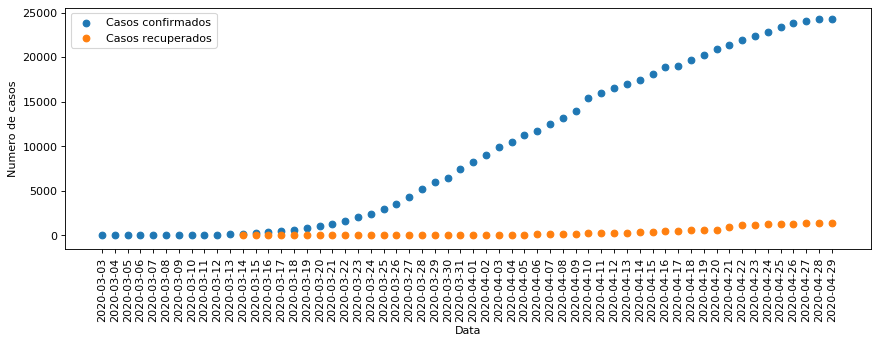

In [3]:
figure(num=None, figsize=(13, 4), dpi=80, facecolor='w', edgecolor='k')

sorted_df_1 = df_1.sort_values(by=['data_relatorio'])

x = sorted_df_1.data_relatorio
y = sorted_df_1.confirmados
y1 = sorted_df_1.recuperados

plt.xlabel('Data')
plt.ylabel('Numero de casos')
plt.xticks(rotation='vertical')

plt.scatter(x, y, linewidths=1, label='Casos confirmados')
plt.scatter(x, y1, linewidths=1, label='Casos recuperados')
plt.legend()

In [4]:
import os
import sys
from osgeo import ogr
from qgis.core import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/ProgramData/Anaconda3/envs/qgis_stable/Library
Prefix:		C:/ProgramData/Anaconda3/envs/qgis_stable/Library
Plugin Path:		C:/ProgramData/Anaconda3/envs/qgis_stable/Library/plugins
Package Data Path:	C:/ProgramData/Anaconda3/envs/qgis_stable/Library/.
Active Theme Name:	
Active Theme Path:	C:/ProgramData/Anaconda3/envs/qgis_stable/Library/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:/ProgramData/Anaconda3/envs/qgis_stable/Library/./svg/
		C:/Users/bruna/AppData/Roaming/python\profiles\default/svg/
User DB Path:	C:/ProgramData/Anaconda3/envs/qgis_stable/Library/./resources/qgis.db
Auth DB Path:	C:/Users/bruna/AppData/Roaming/python\profiles\default/qgis-auth.db



In [5]:
covid_gpkg = "Dados/Portugal/covid-pt-2020-04-25.gpkg"
conn = ogr.Open(covid_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(covid_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))


Layer concelho loaded
Layer distrito loaded
Layer raa_central_concelho loaded
Layer raa_central_ilha loaded
Layer raa_ocidental_concelho loaded
Layer raa_ocidental_ilha loaded
Layer raa_oriental_concelho loaded
Layer raa_oriental_ilha loaded
Layer ram_concelho loaded
Layer ram_ilha loaded
Layer layer_styles loaded
Layer confirmados_concelho loaded
Layer confirmados_distrito_ilha loaded
Layer situacao_epidemiologica loaded
Layer covid-pt-2020-04-25 loaded


In [6]:
concelho = QgsProject.instance().mapLayersByName('concelho')[0]
for c in concelho.getFeatures():
        print("Em {} há {} caso(s) confirmados".format(c["concelho"], c["confirmados_concelho_25/04/2020"]))

Em ÁGUEDA há 41 caso(s) confirmados
Em ALBERGARIA-A-VELHA há 62 caso(s) confirmados
Em ANADIA há 31 caso(s) confirmados
Em AROUCA há 30 caso(s) confirmados
Em AVEIRO há 250 caso(s) confirmados
Em CASTELO DE PAIVA há 10 caso(s) confirmados
Em ESPINHO há 66 caso(s) confirmados
Em ESTARREJA há 52 caso(s) confirmados
Em SANTA MARIA DA FEIRA há 358 caso(s) confirmados
Em ÍLHAVO há 95 caso(s) confirmados
Em MEALHADA há 14 caso(s) confirmados
Em MURTOSA há 8 caso(s) confirmados
Em OLIVEIRA DE AZEMÉIS há 149 caso(s) confirmados
Em OLIVEIRA DO BAIRRO há 17 caso(s) confirmados
Em OVAR há 536 caso(s) confirmados
Em SÃO JOÃO DA MADEIRA há 55 caso(s) confirmados
Em SEVER DO VOUGA há 29 caso(s) confirmados
Em VAGOS há 17 caso(s) confirmados
Em VALE DE CAMBRA há 85 caso(s) confirmados
Em ALJUSTREL há NULL caso(s) confirmados
Em ALMODÔVAR há 3 caso(s) confirmados
Em ALVITO há NULL caso(s) confirmados
Em BARRANCOS há NULL caso(s) confirmados
Em BEJA há 9 caso(s) confirmados
Em CASTRO VERDE há NULL caso

Em MOITA há 62 caso(s) confirmados
Em MONTIJO há 40 caso(s) confirmados
Em PALMELA há 18 caso(s) confirmados
Em SANTIAGO DO CACÉM há 14 caso(s) confirmados
Em SEIXAL há 152 caso(s) confirmados
Em SESIMBRA há 19 caso(s) confirmados
Em SETÚBAL há 59 caso(s) confirmados
Em SINES há NULL caso(s) confirmados
Em ARCOS DE VALDEVEZ há 50 caso(s) confirmados
Em CAMINHA há 14 caso(s) confirmados
Em MELGAÇO há 32 caso(s) confirmados
Em MONÇÃO há 66 caso(s) confirmados
Em PAREDES DE COURA há 7 caso(s) confirmados
Em PONTE DA BARCA há 5 caso(s) confirmados
Em PONTE DE LIMA há 24 caso(s) confirmados
Em VALENÇA há 7 caso(s) confirmados
Em VIANA DO CASTELO há 133 caso(s) confirmados
Em VILA NOVA DE CERVEIRA há 6 caso(s) confirmados
Em ALIJÓ há NULL caso(s) confirmados
Em BOTICAS há NULL caso(s) confirmados
Em CHAVES há 23 caso(s) confirmados
Em MESÃO FRIO há NULL caso(s) confirmados
Em MONDIM DE BASTO há NULL caso(s) confirmados
Em MONTALEGRE há 3 caso(s) confirmados
Em MURÇA há 10 caso(s) confirmados

In [7]:
expr_sem_casos = QgsExpression( " \"confirmados_concelho_25/04/2020\" IS NULL " )
virgens = list(concelho.getFeatures( QgsFeatureRequest( expr_sem_casos ) ))
for c in virgens:
        print("Em {} não há pelos menos 3 casos confirmados".format(c["concelho"]))

Em ALJUSTREL não há pelos menos 3 casos confirmados
Em ALVITO não há pelos menos 3 casos confirmados
Em BARRANCOS não há pelos menos 3 casos confirmados
Em CASTRO VERDE não há pelos menos 3 casos confirmados
Em FERREIRA DO ALENTEJO não há pelos menos 3 casos confirmados
Em MÉRTOLA não há pelos menos 3 casos confirmados
Em OURIQUE não há pelos menos 3 casos confirmados
Em VIDIGUEIRA não há pelos menos 3 casos confirmados
Em FREIXO DE ESPADA À CINTA não há pelos menos 3 casos confirmados
Em MOGADOURO não há pelos menos 3 casos confirmados
Em BELMONTE não há pelos menos 3 casos confirmados
Em FUNDÃO não há pelos menos 3 casos confirmados
Em IDANHA-A-NOVA não há pelos menos 3 casos confirmados
Em OLEIROS não há pelos menos 3 casos confirmados
Em PENAMACOR não há pelos menos 3 casos confirmados
Em PROENÇA-A-NOVA não há pelos menos 3 casos confirmados
Em VILA DE REI não há pelos menos 3 casos confirmados
Em VILA VELHA DE RÓDÃO não há pelos menos 3 casos confirmados
Em PAMPILHOSA DA SERRA não

In [8]:
xt = concelho.extent()
# print(xt)
width  = 400
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([concelho])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image_1 = render.renderedImage()


Gerar mapa com 400 por 819


No seguinte mapa é possível observar o número de casos de cada concelho de Portugal no dia 25 de Abril de 2020.

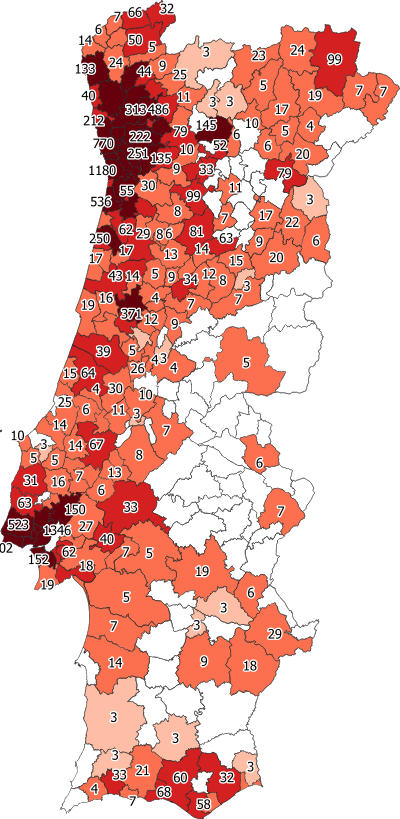

In [9]:
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image_1.save( imgbuf,"PNG" )
Image( imgbuf.data() )

In [10]:
distrito = QgsProject.instance().mapLayersByName('distrito')[0]
for d in distrito.getFeatures():
        print("Em {} há {} caso(s) confirmados".format(d["distrito"], d["confirmados_distrito_25/04/2020"]))

Em AVEIRO há 1905 caso(s) confirmados
Em BEJA há 65 caso(s) confirmados
Em BRAGA há 2438 caso(s) confirmados
Em BRAGANÇA há 208 caso(s) confirmados
Em CASTELO BRANCO há 16 caso(s) confirmados
Em COIMBRA há 639 caso(s) confirmados
Em ÉVORA há 40 caso(s) confirmados
Em FARO há 318 caso(s) confirmados
Em GUARDA há 182 caso(s) confirmados
Em LEIRIA há 218 caso(s) confirmados
Em LISBOA há 3431 caso(s) confirmados
Em PORTALEGRE há 13 caso(s) confirmados
Em PORTO há 7486 caso(s) confirmados
Em SANTARÉM há 265 caso(s) confirmados
Em SETÚBAL há 687 caso(s) confirmados
Em VIANA DO CASTELO há 344 caso(s) confirmados
Em VILA REAL há 250 caso(s) confirmados
Em VISEU há 440 caso(s) confirmados


In [11]:
expr_sem_casos = QgsExpression( " \"confirmados_distrito_25/04/2020\" IS NULL " )
virgens = list(distrito.getFeatures( QgsFeatureRequest( expr_sem_casos ) ))
for d in virgens:
        print("Em {} não há pelos menos 3 casos confirmados".format(d["distrito"]))

In [12]:
xt = distrito.extent()
# print(xt)
width  = 400
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([distrito])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image_2 = render.renderedImage()

Gerar mapa com 400 por 819


No seguinte mapa é possível observar o número de casos de cada distrito de Portugal no dia 25 de Abril de 2020.

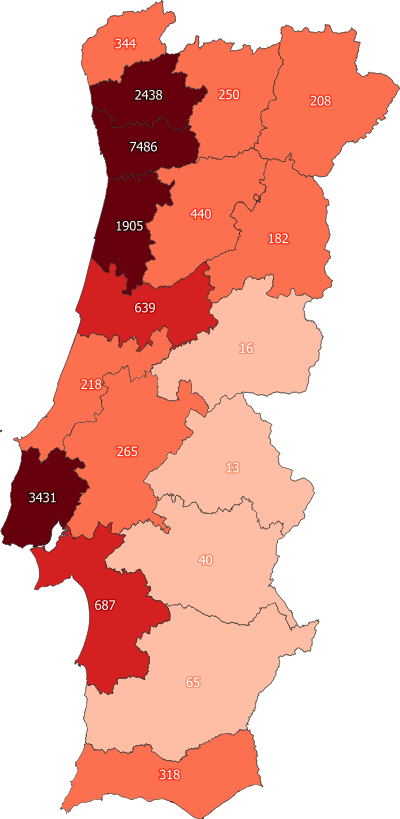

In [13]:
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image_2.save( imgbuf,"PNG" )
Image( imgbuf.data() )

# Exploração dados COVID-19 em Itália
Os dados referentes às estatísticas do COVID-19 em Itália foram retirados do repositório: https://github.com/pcm-dpc/COVID-19

Na seguinte tabela é possível observar a evolução do COVID-19 em Itália. 

In [14]:
df_3 = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv")
df_3.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN


Nos gráficos abaixo é possível visualizar a relação da evolução dos casos confirmados e dos casos recuperados ao longo do tempo em Itália.

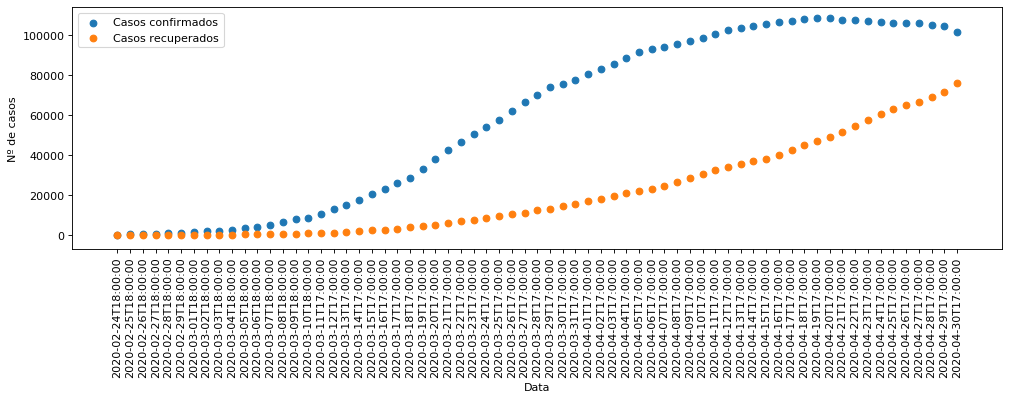

In [15]:
figure(num=None, figsize=(15, 4), dpi=80, facecolor='w', edgecolor='k')

sorted_df_3 = df_3.sort_values(by=['data'])

x = sorted_df_3.data
y = sorted_df_3.totale_positivi
y1 = sorted_df_3.dimessi_guariti

plt.xlabel('Data')
plt.ylabel('Nº de casos')
plt.xticks(rotation='vertical')

plt.scatter(x, y, linewidths=1, label='Casos confirmados')
plt.scatter(x, y1, linewidths=1, label='Casos recuperados')
plt.legend()

Na seguinte tabela é possível observar os dados do COVID-19 nas regiões de Itália no dia 25 de Abril de 2020. 

In [16]:
df_4 = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200425.csv")
df_4.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-04-25T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,323,26,349,1712,2061,-18,29,478,293,2832,33624,25959,NaN,NaN
1,2020-04-25T17:00:00,ITA,17,Basilicata,40.639471,15.805148,58,7,65,153,218,-11,1,118,25,361,9792,9792,NaN,NaN
2,2020-04-25T17:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,141,14,155,880,1035,-58,20,1176,265,2476,36608,17573,NaN,NaN
3,2020-04-25T17:00:00,ITA,18,Calabria,38.905976,16.594402,125,7,132,679,811,-10,9,197,80,1088,29959,28006,NaN,NaN
4,2020-04-25T17:00:00,ITA,15,Campania,40.839566,14.250850,543,55,598,2337,2935,-8,17,1023,341,4299,64521,41399,NaN,NaN


No gráfico abaixo é possível visualizar o número de casos positivos nas regiões de Itália no dia 25 de Abril de 2020.

<BarContainer object of 21 artists>

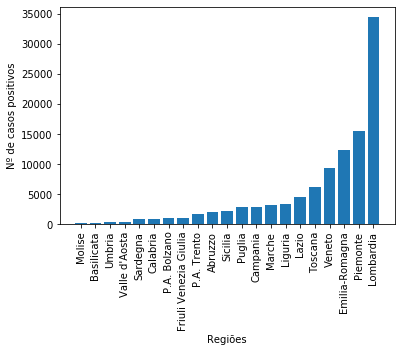

In [17]:
sorted_df_4 = df_4.sort_values(by=['totale_positivi'])

x = sorted_df_4.denominazione_regione
y = sorted_df_4.totale_positivi
plt.xlabel('Regiões')
plt.ylabel('Nº de casos positivos')
plt.xticks(rotation='vertical')
plt.bar(x,y)

In [18]:
projectName = 'qgis\mapa_italia.qgz'
project = QgsProject.instance()
# demora a ler o projeto...
print("Abrindo o projeto guardado como {}...".format(projectName))
project.read(projectName)
print("... projeto {} pronto para processar!".format(project.title()))

Abrindo o projeto guardado como qgis\mapa_italia.qgz...
... projeto  pronto para processar!


In [19]:
for layer in QgsProject.instance().mapLayers().values():
    print('reload layer {}'.format( layer.name() ))
    layer.reload()

reload layer map
reload layer regions_with_covid


In [20]:
manager = project.layoutManager()

layoutName = 'italia'
imagem_regioes = 'italia.png'
layout = manager.layoutByName(layoutName)
if layout:
    exporter = QgsLayoutExporter(layout)
    print("A exportar a composição {} em PNG...".format(layoutName))
    exporter.exportToImage( imagem_regioes, QgsLayoutExporter.ImageExportSettings() )
    print("Feito!")
else:
    print('Problema a ler as composições do projeto')

A exportar a composição italia em PNG...
Feito!


No seguinte mapa é possível observar o número de casos de cada região de Itália no dia 25 de Abril de 2020.

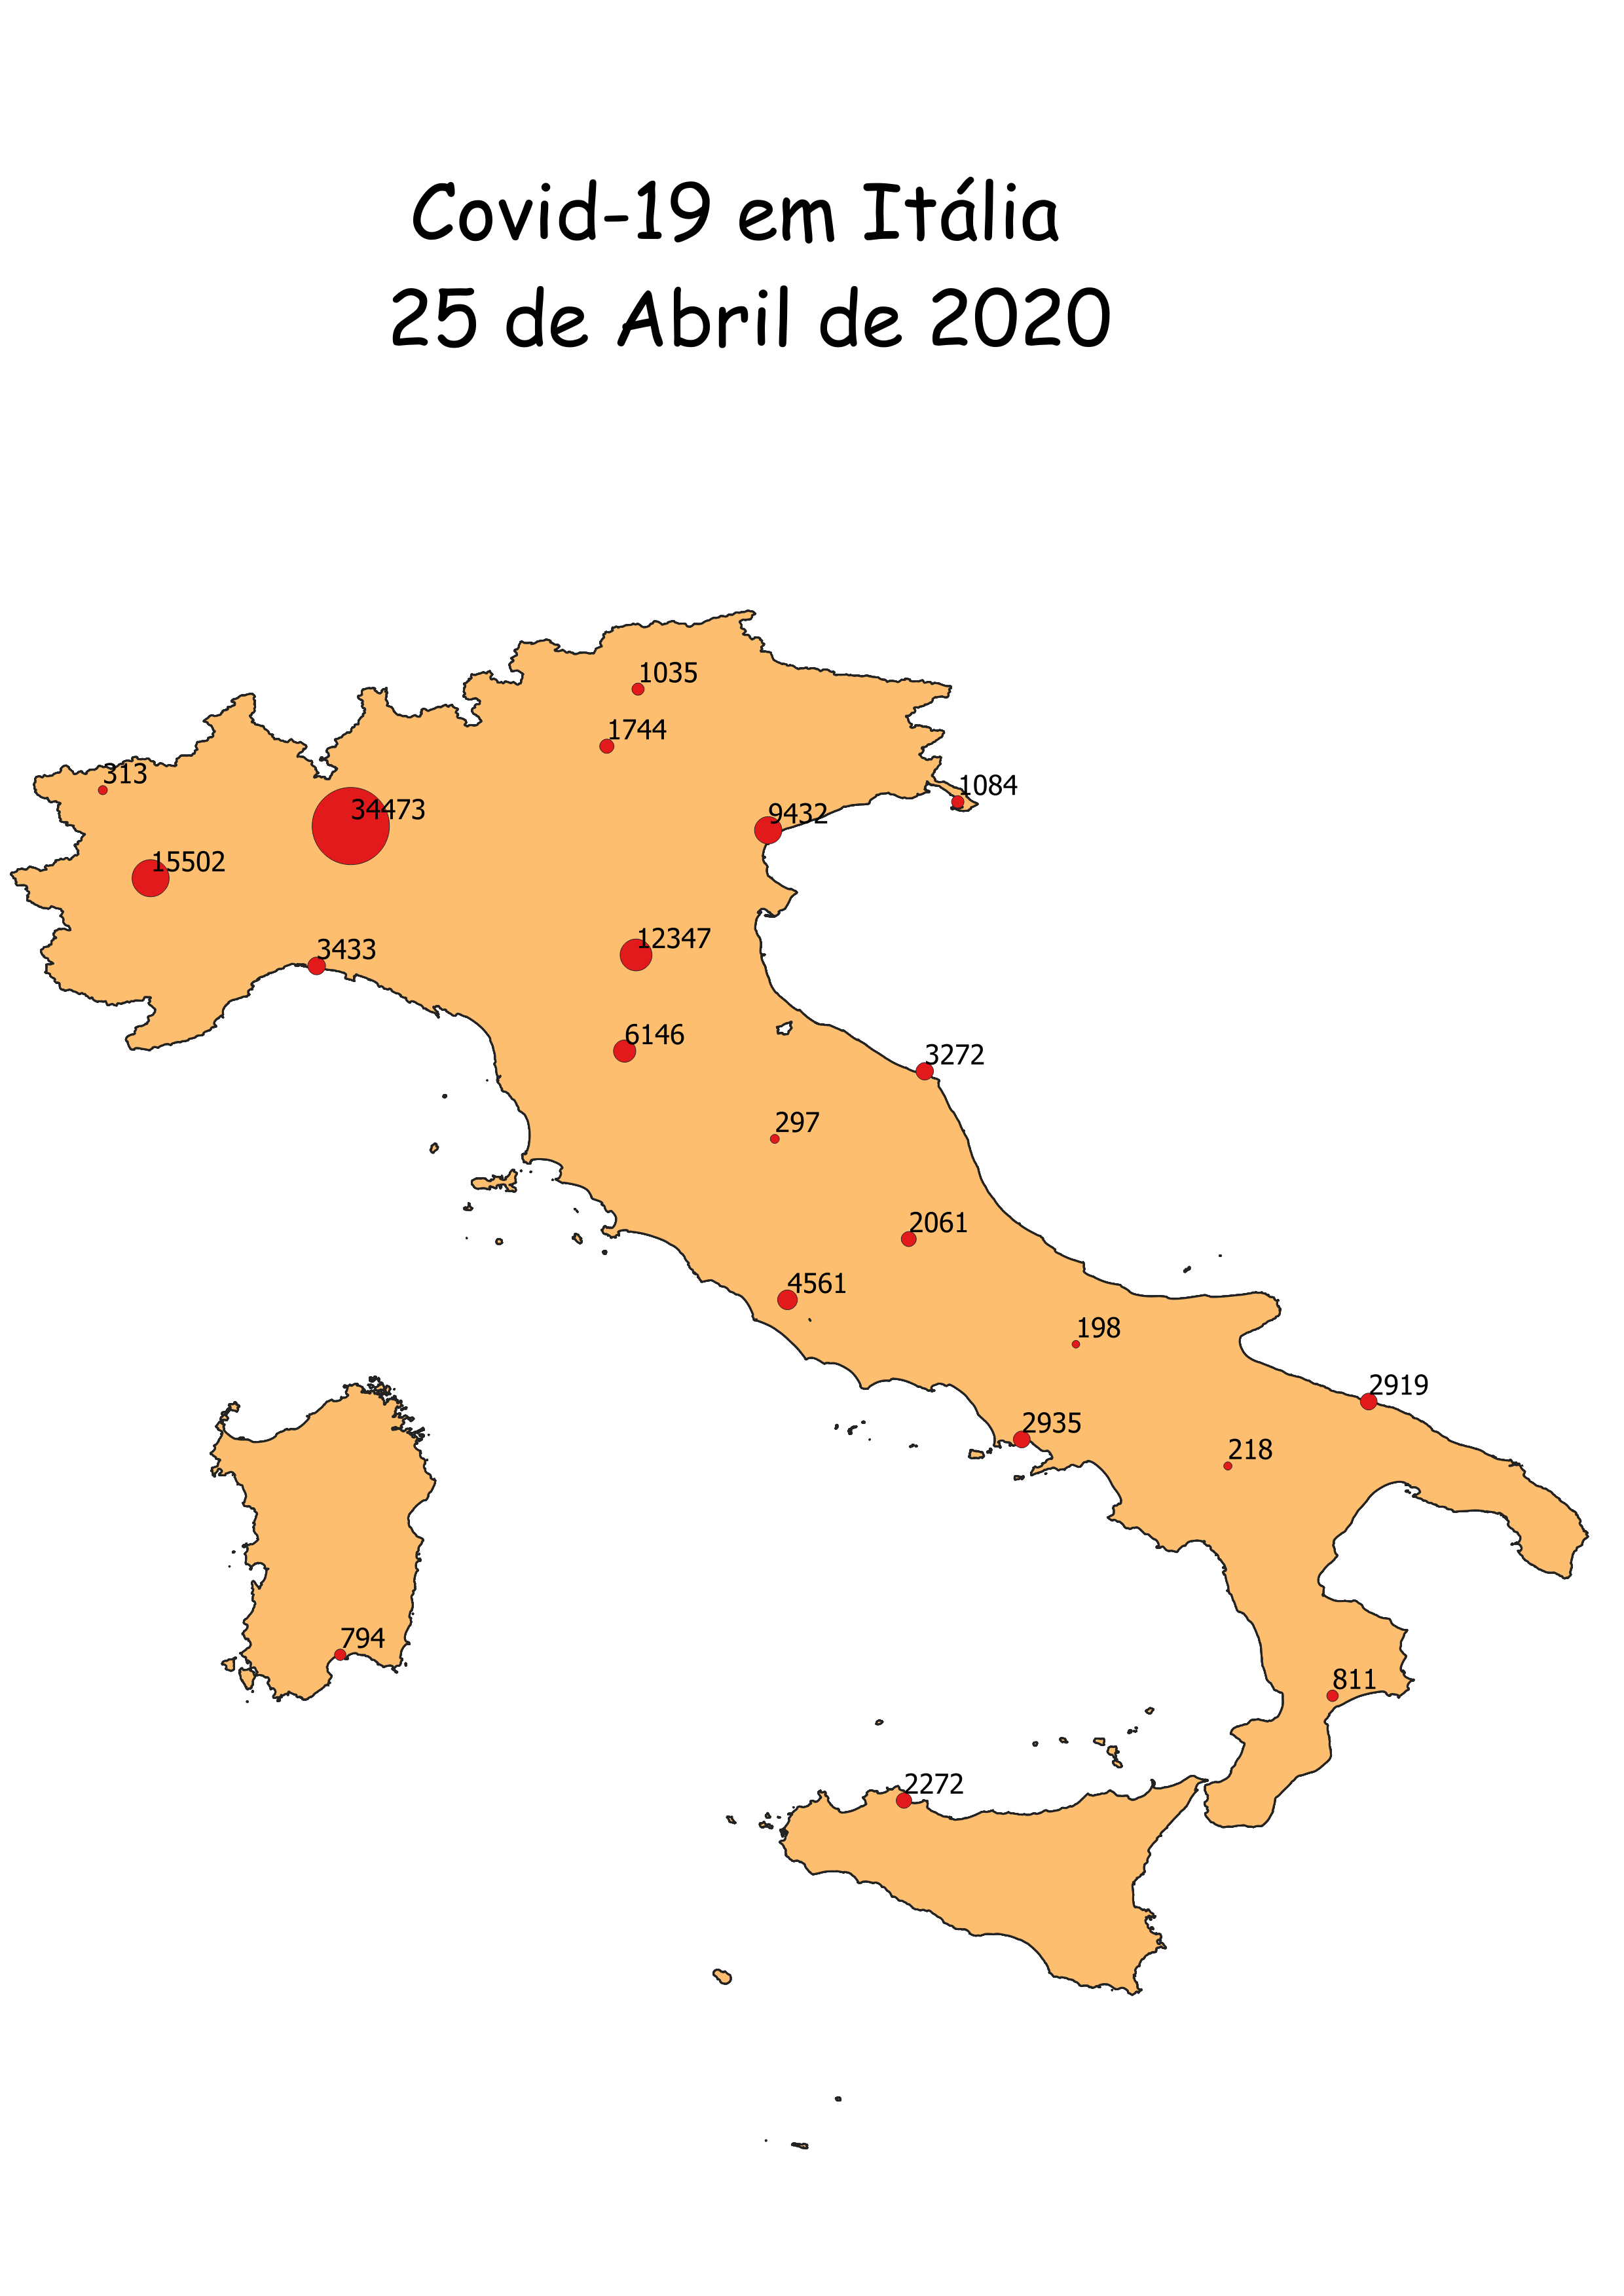

In [21]:
from IPython.display import Image
Image( imagem_regioes )

# Exploração dados COVID-19 no mundo
Os dados referentes às estatísticas do COVID-19 no mundo foram retirados do repositório: https://github.com/CSSEGISandData/COVID-19

Na seguinte tabela é possível observar a evolução do número de casos confirmados do COVID-19 no mundo. 

In [22]:
df_5 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_5.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,584,609,634,663,678,712,726,736,750,766
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,717,723,723,731,738,738,743,743,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,25,25,25,25,26,27,27,27


No gráfico abaixo é possível visualizar o número de casos positivos em França, Itália, Portugal, Espanha, Suíça e nos Estados Unidos no dia 26 de Abril de 2020.

<BarContainer object of 1 artists>

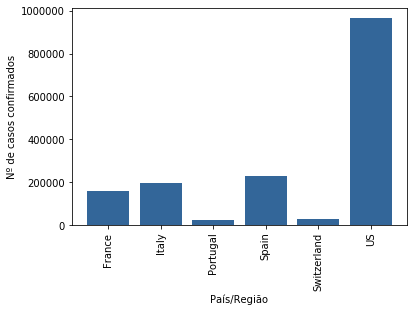

In [23]:
sorted_df_5 = df_5.sort_values(by=['Country/Region'])

x = sorted_df_5.loc[116]['Country/Region']
x1 = sorted_df_5.loc[137]['Country/Region']
x2 = sorted_df_5.loc[184]['Country/Region']
x3 = sorted_df_5.loc[201]['Country/Region']
x4 = sorted_df_5.loc[206]['Country/Region']
x5 = sorted_df_5.loc[225]['Country/Region']

y = sorted_df_5.loc[116]["4/26/20"]
y1 = sorted_df_5.loc[137]["4/26/20"]
y2 = sorted_df_5.loc[184]["4/26/20"]
y3 = sorted_df_5.loc[201]["4/26/20"]
y4 = sorted_df_5.loc[206]["4/26/20"]
y5 = sorted_df_5.loc[225]["4/26/20"]

plt.xlabel('País/Região')
plt.ylabel('Nº de casos confirmados')
plt.xticks(rotation='vertical')

plt.bar(x, y, color=(0.2, 0.4, 0.6, 1))
plt.bar(x1, y1, color=(0.2, 0.4, 0.6, 1))
plt.bar(x2, y2, color=(0.2, 0.4, 0.6, 1))
plt.bar(x3, y3, color=(0.2, 0.4, 0.6, 1))
plt.bar(x4, y4, color=(0.2, 0.4, 0.6, 1))
plt.bar(x5, y5, color=(0.2, 0.4, 0.6, 1))

In [24]:
projectName = 'qgis\mapa_mundo.qgz'
project = QgsProject.instance()
# demora a ler o projeto...
print("Abrindo o projeto guardado como {}...".format(projectName))
project.read(projectName)
print("... projeto {} pronto para processar!".format(project.title()))

Abrindo o projeto guardado como qgis\mapa_mundo.qgz...
... projeto  pronto para processar!


In [25]:
for layer in QgsProject.instance().mapLayers().values():
    print('reload layer {}'.format( layer.name() ))
    layer.reload()

reload layer countries
reload layer countries_with_covid
reload layer covid


In [26]:
manager = project.layoutManager()

layoutName = 'mundo'
imagem_mundo = 'mundo.png'
layout = manager.layoutByName(layoutName)
if layout:
    exporter = QgsLayoutExporter(layout)
    print("A exportar a composição {} em PNG...".format(layoutName))
    exporter.exportToImage( imagem_mundo, QgsLayoutExporter.ImageExportSettings() )
    print("Feito!")
else:
    print('Problema a ler as composições do projeto')

A exportar a composição mundo em PNG...
Feito!


No seguinte mapa é possível observar o número de casos de cada país do mundo no dia 25 de Abril de 2020.

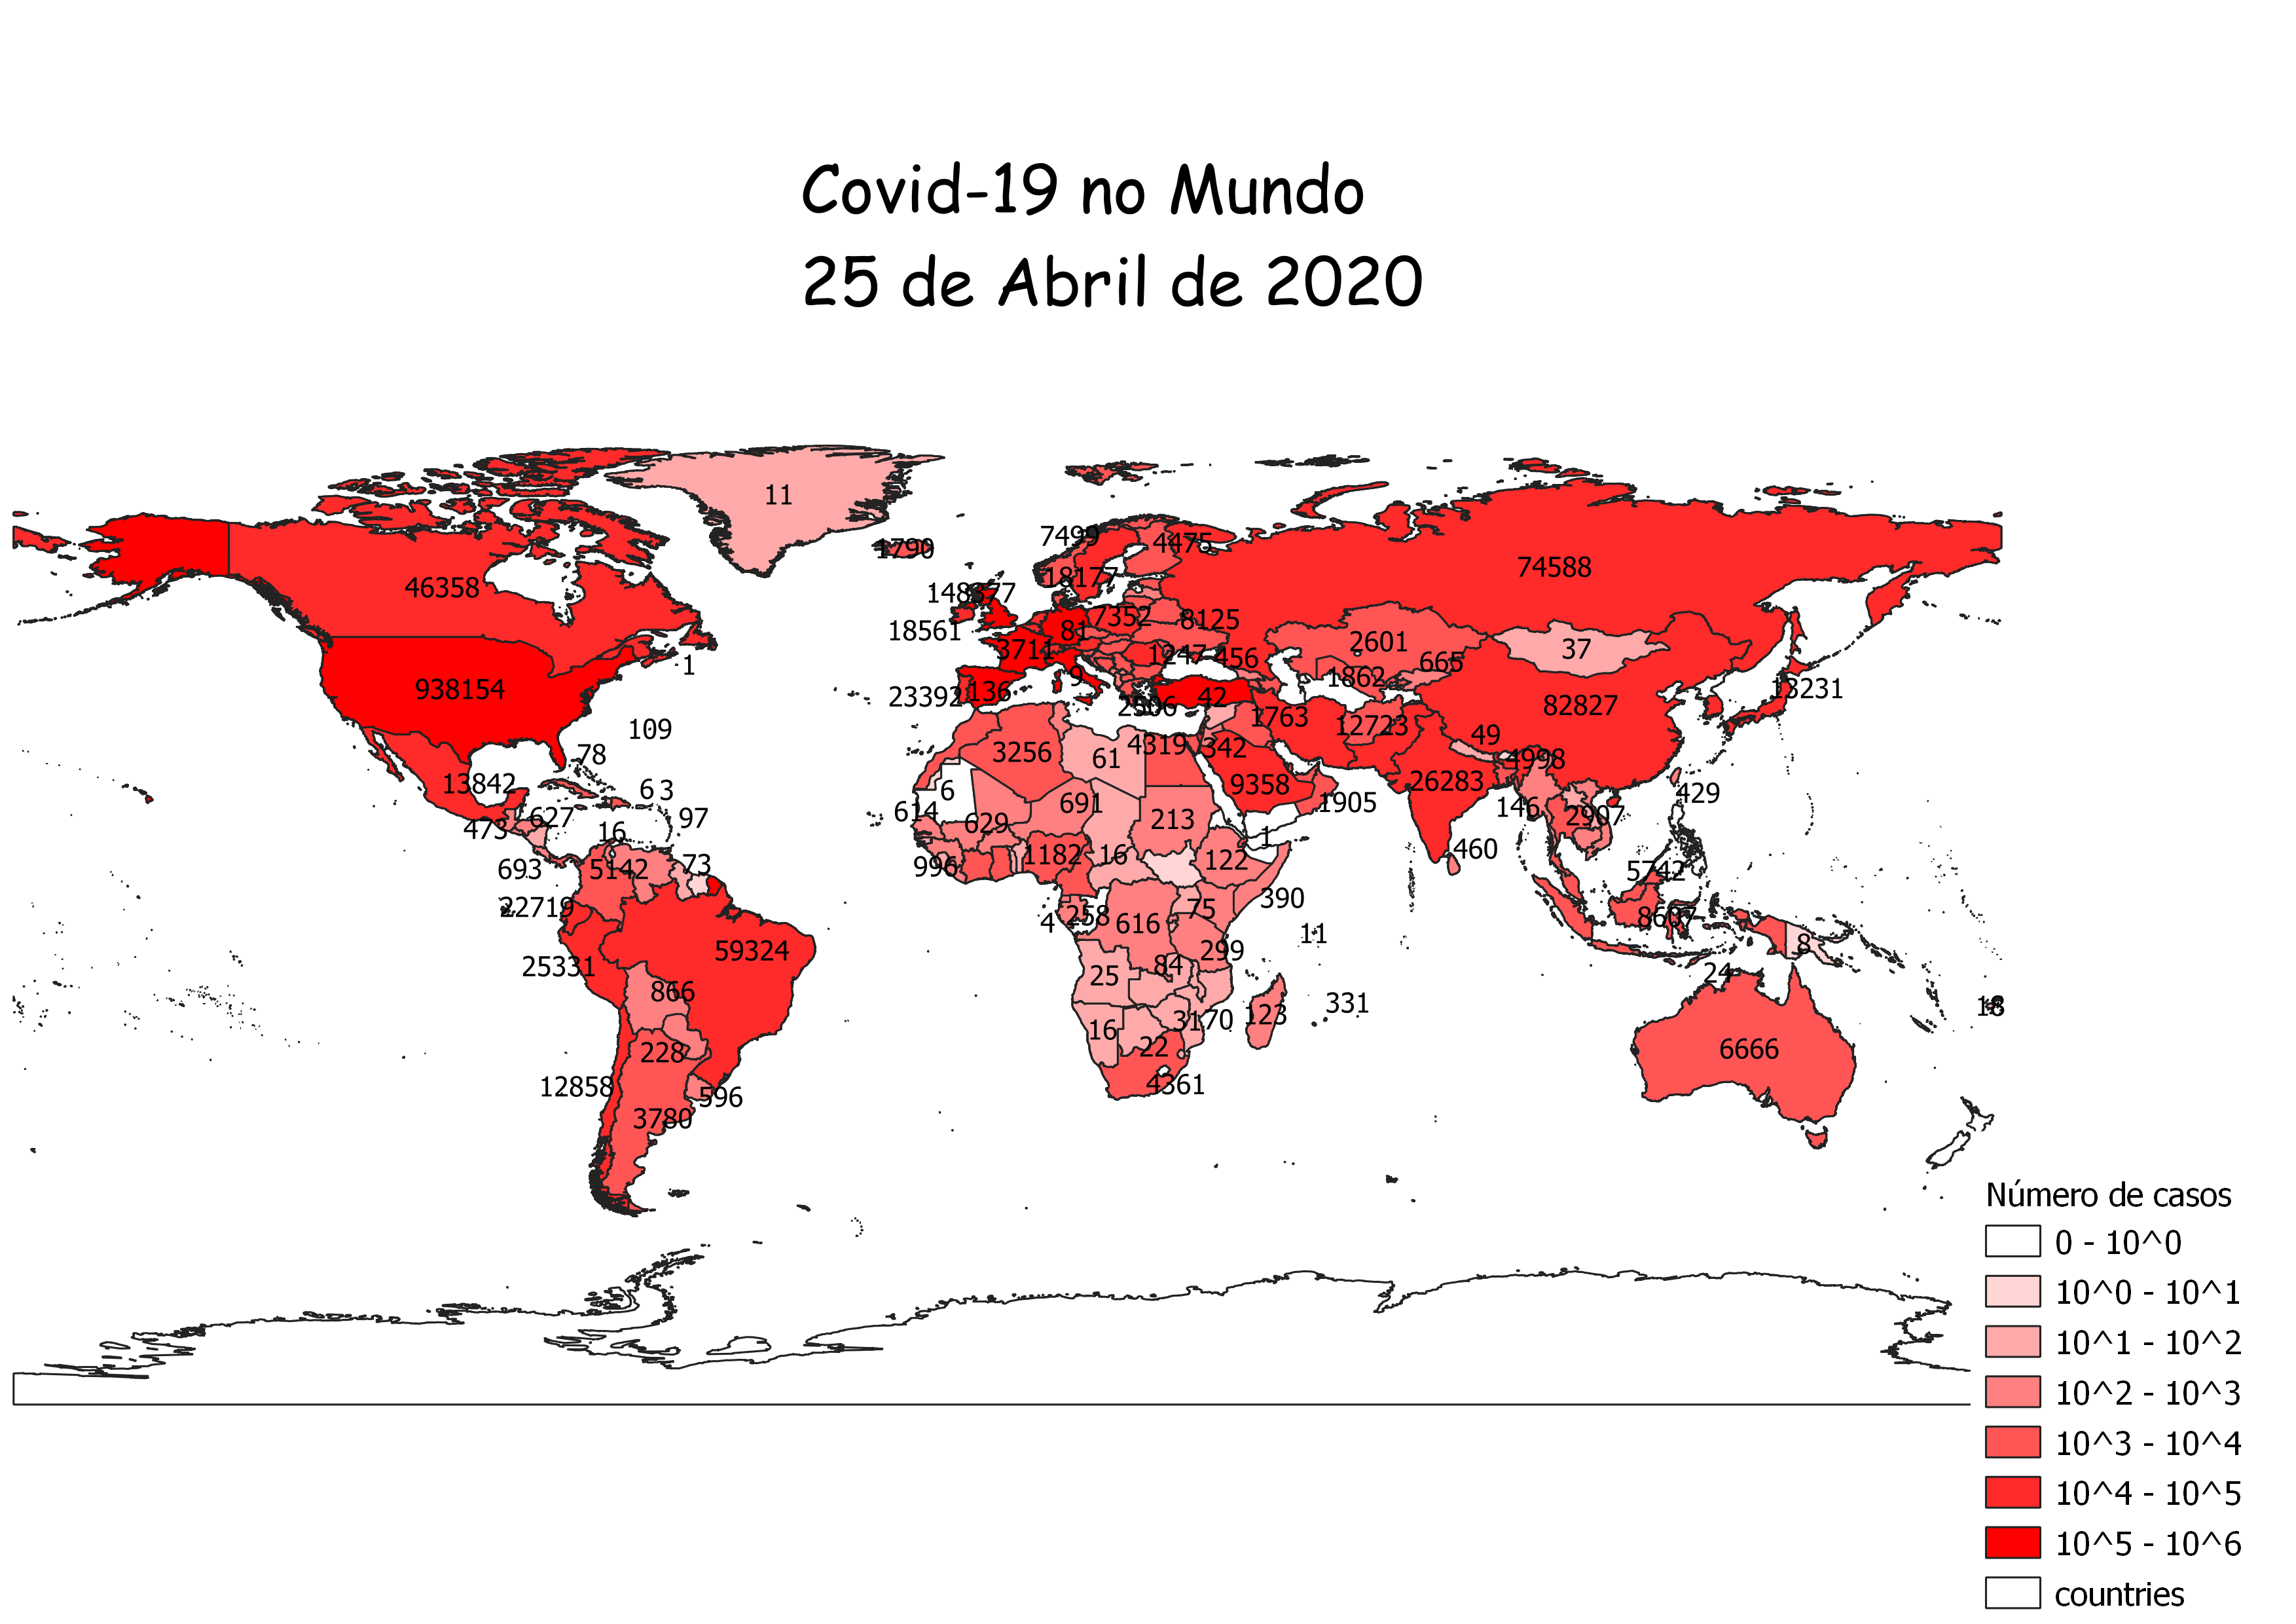

In [27]:
from IPython.display import Image
Image( imagem_mundo )

In [28]:
qgs.exitQgis()